In [1]:
import pandas as pd
import numpy as np

In [4]:
df1=pd.read_csv('https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv')

In [5]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exploratory data analysis and visualization

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
## setting default style for chart
sns.set_style(style='darkgrid')
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize']=(10,6)

In [13]:
df1.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

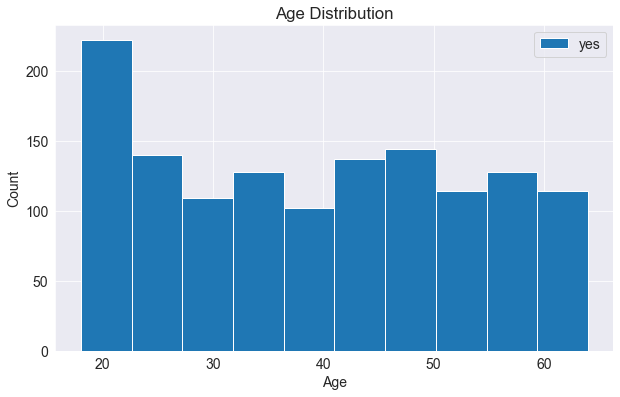

In [26]:
# visualizing age parameter
plt.hist(df1.age)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.legend(df1.smoker)


In [32]:
fig=px.histogram(df1,x='age',color='smoker',title='Age distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [40]:
## visualizing BMI
fig=px.histogram(df1,x='bmi',title='BMI Count',color='sex')
fig.update_layout(bargap=0.1)

In [34]:
df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [43]:
fig=px.scatter(df1,x='age',y='bmi',color='sex')
fig

In [48]:
## visualizing charges 
fig=px.histogram(df1,x='charges',color='sex',title='Sex vs Charges')
fig.update_layout(bargap=0.1)

In [58]:
fig=px.scatter(df1,x='age',y='charges',color='smoker')
fig

In [49]:
fig=px.histogram(df1,x='charges',color='smoker',title='charges vs smoker')
fig.update_layout(bargap=0.1)

In [51]:
df1.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [52]:
df1.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [54]:
fig=px.histogram(df1,x='sex',color='smoker',title='Male vs Female smokers')
fig.update_layout(bargap=0.1)

In [60]:
fig=px.scatter(df1,x='bmi',y='charges',color='smoker')
fig

## Linear regression model

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Testing the model if the person smoker

In [188]:
df2=df1[df1.smoker=='yes']
df2.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577


In [189]:
dummies=pd.get_dummies(df2,columns=['sex','smoker','region'],drop_first=True)
dummies

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,0,0,1
11,62,26.290,0,27808.72510,0,0,1,0
14,27,42.130,0,39611.75770,1,0,1,0
19,30,35.300,0,36837.46700,1,0,0,1
23,34,31.920,1,37701.87680,0,0,0,0
...,...,...,...,...,...,...,...,...
1313,19,34.700,2,36397.57600,0,0,0,1
1314,30,23.655,3,18765.87545,0,1,0,0
1321,62,26.695,0,28101.33305,1,0,0,0
1323,42,40.370,2,43896.37630,0,0,1,0


In [190]:
x=dummies.drop(['charges'],axis='columns')
y=dummies.charges
y.head(3)

0     16884.9240
11    27808.7251
14    39611.7577
Name: charges, dtype: float64

## Splitting dataset into training & testing dataset

In [218]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.1)

In [219]:
x_train.shape

(246, 7)

In [220]:
x_test.shape

(28, 7)

## Creating the model

In [221]:
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_train)
predicted
pd.DataFrame({'actual':y_train,'predicted':predicted})

,actual,predicted
893,44202.65360,45045.334503
795,18310.74200,24941.589972
618,34439.85590,29113.074959
380,15006.57945,11896.677563
1267,34254.05335,29092.606387
...,...,...
1112,24180.93350,27059.076024
30,35585.57600,34608.411675
1078,34672.14720,28846.656527
896,19798.05455,19176.738063


In [222]:
model.score(x_train,y_train)

0.7621411362128127

In [223]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_log_error',cv=7)
np.mean(cvs)

-0.03944730268633582

In [224]:
model.score(x_test,y_test)

0.6849710873562871

In [225]:
y_pred=model.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='charges', ylabel='Density'>

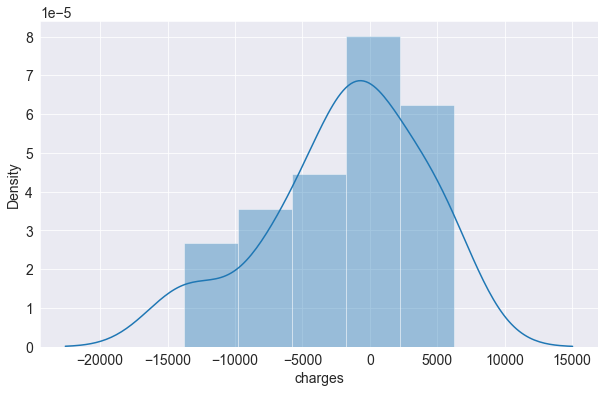

In [226]:
sns.distplot(y_pred-y_test)

In [255]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=500, max_iter=10000, tol=0.001)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=500, max_iter=10000, tol=0.001)

In [256]:
lasso_reg.score(x_train,y_train)

0.7556247467028918

In [257]:
lasso_reg.score(x_test,y_test)

0.7031225696247849

In [297]:
las_pred=lasso_reg.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='charges', ylabel='Density'>

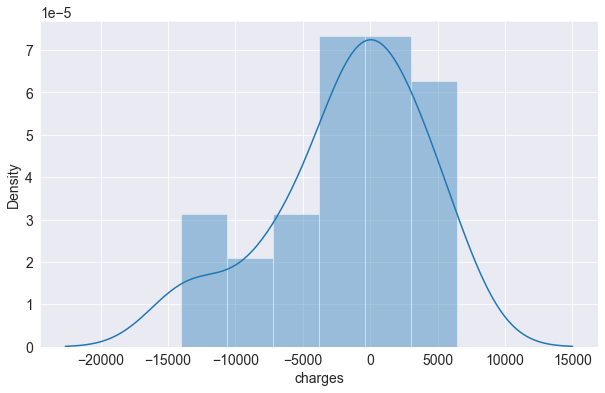

In [298]:
sns.distplot(las_pred-y_test)

In [300]:
pd.DataFrame({'predicted':las_pred,'actual':y_test,'differ':las_pred-y_test})

,predicted,actual,differ
1031,42517.267210,44423.80300,-1906.535790
1274,23471.788086,17043.34140,6428.446686
203,36441.719029,37133.89820,-692.179171
587,30000.078028,43943.87610,-13943.798072
982,23143.738836,19199.94400,3943.794836
34,37153.845724,51194.55914,-14040.713416
153,22453.027231,19964.74630,2488.280931
736,42309.026696,40419.01910,1890.007596
1188,25391.283893,21771.34230,3619.941593
524,26257.173377,38245.59327,-11988.419893


In [196]:
x_train.head()

,age,bmi,children,sex_male,region_northwest,region_southeast,region_southwest
417,36,22.600,2,0,0,0,1
854,49,23.845,3,0,0,0,0
674,44,43.890,2,0,0,1,0
896,43,20.045,2,0,0,0,0
338,50,32.300,1,1,0,0,0


#### Testing the model if person is non smoker

In [261]:
df3=(df1[df1.smoker=='no'])
df3

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [264]:
d1=pd.get_dummies(df3,drop_first=True)
d1.head(3)

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest
1,18,33.770,1,1725.55230,1,0,1,0
2,28,33.000,3,4449.46200,1,0,1,0
3,33,22.705,0,21984.47061,1,1,0,0


In [270]:
x1=d1.drop(['charges'],axis='columns')
x1.head(3)

,age,bmi,children,sex_male,region_northwest,region_southeast,region_southwest
1,18,33.770,1,1,0,1,0
2,28,33.000,3,1,0,1,0
3,33,22.705,0,1,1,0,0


In [271]:
y1=d1.charges
y1.head(3)

1     1725.55230
2     4449.46200
3    21984.47061
Name: charges, dtype: float64

In [273]:
x1_train, x1_test, y1_train, y1_test =train_test_split(x1,y1,test_size=0.2)


In [274]:
x1_train.shape

(851, 7)

In [275]:
y1_test.shape

(213,)

In [277]:
model2=LinearRegression()
model2.fit(x1_train,y1_train)
model2.score(x1_train,y1_train)

0.41285456681955723

In [278]:
model2.score(x1_test,y1_test)

0.4277511863733898

In [293]:
from sklearn import linear_model
lasso2=linear_model.Lasso(alpha=10,max_iter=10000,tol=0.001)
lasso2.fit(x1_train,y1_train)

Lasso(alpha=10, max_iter=10000, tol=0.001)

In [294]:
lasso2.score(x1_train,y1_train)

0.41269822407556

In [295]:
lasso2.score(x1_test,y1_test)

0.4289946752777116